In [1]:
import mne
from mne.datasets import sample

In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname)
print(raw)

Opening raw data file /Users/reallo/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.7 MB, data not loaded>


### 通过脑分区选择channels
'Vertex'
'Left-temporal'
'Right-temporal'
'Left-parietal'
'Right-parietal'
'Left-occipital'
'Right-occipital'
'Left-frontal'
'Right-frontal'

In [30]:
selection = mne.read_selection('Left-temporal')
picks = mne.pick_types(raw.info,meg='mag',eeg=False,eog=False,
                      stim=False,selection=selection)
data,time = raw[picks,0:50] # 0:50表示取0到50时刻的数据，通道为Left-temporal
print("data shape:",data.shape) # 注意(13,50)中的13表示MEG设备从13时刻开始记录数据

('data shape:', (13, 50))


### Plot the power spectral density across selected channels 

Effective window size : 3.410 (s)


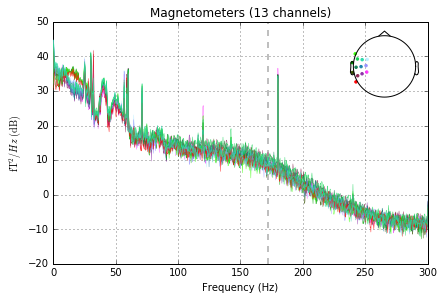

In [31]:
raw.plot_psd(picks=picks,tmin=0,tmax=50);

In [ ]:
#save data
raw.save('sample_channels_raw.fif',picks=picks,overwrite=True)

Opening raw data file /home/reallocing/Code/MNE/sample_channels_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


<ipython-input-25-282f72586078>:2: RuntimeWarning: Projection vector "PCA-v1" has magnitude 0.14 (should be unity), applying projector with 13/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  sample.plot();
<ipython-input-25-282f72586078>:2: RuntimeWarning: Projection vector "PCA-v2" has magnitude 0.09 (should be unity), applying projector with 13/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  sample.plot();
<ipython-input-25-282f72586078>:2: RuntimeWarning: Projection vector "PCA-v3" has magnitude 0.49 (should be unity), applying projector with 13/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels 

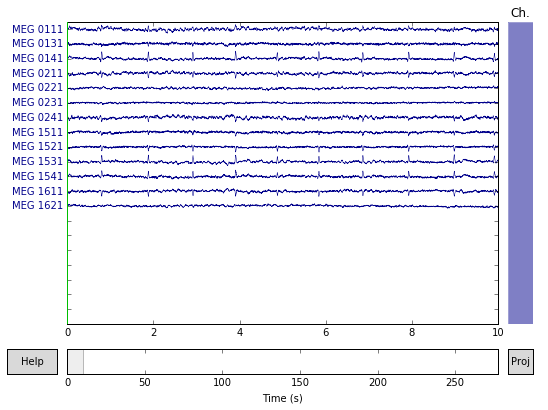

<Raw  |  sample_channels_raw.fif, n_channels x n_times : 13 x 166800 (277.7 sec), ~3.0 MB, data not loaded>


In [25]:
sample = mne.io.read_raw_fif('sample_channels_raw.fif')
sample.plot();
print(sample)
# 13 x 166800 (277.7 sec)

### 也可以通过index的方式来选择通道

In [ ]:
## channels segment
channel_seg_data, time = np.array(raw[0:20,:]) # channels range:[0,20]
print("channels segment:",channel_seg_data.shape)

### 通过指定channels name来选择通道

In [ ]:
## Mehtod 1
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']
raw.copy().pick_channels(pick_chans)

In [6]:
## Method 2
data,time = raw[raw.ch_names.index('MEG 0111')]

In [8]:
print(data.shape,time.shape)

(1, 166800) (166800,)
